In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

In [2]:
(x_train , y_train), (x_test, y_test) =datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog","horse", "ship", "truck"]

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)

In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
def plot_image(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index]])

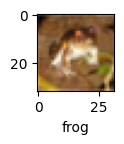

In [13]:
plot_image(0)

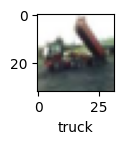

In [14]:
plot_image(2)

In [15]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [16]:
x_train=x_train/255

In [17]:
x_test=x_test/255

In [19]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, input_shape=(32,32,3), activation="relu"), 
    layers.MaxPool2D(pool_size=2, strides=2), 
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(60, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
cnn.fit(x_train , y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 58s 34ms/step - loss: 1.5448 - accuracy: 0.4392
Epoch 2/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2232 - accuracy: 0.5659
Epoch 3/25
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0861 - accuracy: 0.6190
Epoch 4/25
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0089 - accuracy: 0.6482
Epoch 5/25
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9576 - accuracy: 0.6667
Epoch 6/25
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9152 - accuracy: 0.6821
Epoch 7/25
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8821 - accuracy: 0.6923
Epoch 8/25
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8535 - accuracy: 0.7037
Epoch 9/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8287 - accuracy: 0.7113
Epoch 10/25
1563/1563 [==============================] - 37s 23m

In [23]:
y_test=y_test.reshape(-1,)

In [24]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [26]:
y_pred[0]

array([5.7577324e-04, 4.6670693e-04, 2.8098974e-04, 9.5869464e-01,
       4.0777422e-06, 2.1138855e-03, 4.7936374e-03, 1.3258074e-06,
       3.3053000e-02, 1.5923661e-05], dtype=float32)

In [27]:
y_classes=[np.argmax(i) for i in y_pred]

In [34]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.85      0.76      0.81      1000
           2       0.57      0.60      0.59      1000
           3       0.48      0.58      0.52      1000
           4       0.64      0.65      0.64      1000
           5       0.65      0.51      0.57      1000
           6       0.73      0.79      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.77      0.83      0.80      1000
           9       0.77      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

